In [1]:


import sys
    
sys.path += [
"/Users/mklukas/nta/nupic.core/bindings/py/src",
"/Users/mklukas/nta/nupic/src",
"/Users/mklukas/nta/htmresearch-core/bindings/py/src",
"/Users/mklukas/nta/htmresearch",
"/usr/local/lib/python2.7/site-packages",
"/usr/local/Cellar/numpy/1.14.5_1/libexec/nose/lib/python2.7/site-packages" ] 

from collections import defaultdict
import math
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from htmresearch_core.experimental import computeGridUniquenessHypercube


def get_me_a_standard_A(k, m):
    A = np.zeros((m, 2, k), dtype="float")

    for iModule in range(m):
        for iDim in xrange(k):
            a  = np.random.randn(2)
            a /= np.linalg.norm(a)
            s = np.sqrt(2)**float(iModule)
            A[iModule,:,iDim] = a / s
            
    return A


def get_me_this_A_your_talking_about(k, m):
    A = np.zeros((m,2,k))

    frac = m//k

    for i in range(k):
        for j in range(0, frac):
            theta = np.random.sample()*np.pi*2.
            a = np.array([np.cos(theta), np.sin(theta)])
            s = np.sqrt(2)**j
            A[i*frac + j, :, i] = a / s
    
    return A

def doRandomModuleExperiment(ms, ks):
    scales = [1.*(math.sqrt(2)**s) for s in xrange(max(ms))]
    phase_resolution = 0.2

    A = np.zeros((len(scales), 2, max(ks)), dtype="float")

    for iModule, s in enumerate(scales):
        for iDim in xrange(max(ks)):
            a  = np.random.randn(2)
            a /= np.linalg.norm(a)
            A[iModule,:,iDim] = a / s

    results = {}

    for m in ms:
        for k in ks:
#             A_ = A[:m,:,:k]
#             A_ = get_me_this_A_your_talking_about(k,m)
            A_ = get_me_a_standard_A(k,m)
            result = computeGridUniquenessHypercube(A_, phase_resolution, 0.5)
            results[(m, k)] = result[0]
    
    return None, results


def experiment1(mm,kk,  numTrials =1):
    ms = range(1, mm + 1)
    ks = range(1, kk + 1)
    

    allResultsByParams = defaultdict(list)
    for _ in xrange(numTrials):
        A, resultsByParams = doRandomModuleExperiment(ms, ks)
        for params, v in resultsByParams.iteritems():
            allResultsByParams[params].append(v)

    meanResultByParams = {}
    for params, listOfResults in allResultsByParams.iteritems():
        meanResultByParams[params] = (sum(listOfResults) / len(listOfResults))

    timestamp = time.strftime("%Y%m%d-%H%M%S")
    
    # Volume plot
    vol = np.zeros((max(ms), max(ks)))
    print vol.shape
    plt.figure()
    for m in ms:
        x = []
        y = []
        for k in ks:
            vol[m-1, k-1] = math.pow(meanResultByParams[(m,k)], k)
            x.append(k)
            y.append(vol[m-1,k-1])
        plt.plot(x, y, marker='o')
        plt.yscale('log')
        plt.xticks(ks)
        plt.xlabel("Number of dimensions")
        plt.ylabel("Volume of unique hypercube")
        plt.legend(["{} module{}".format(m, "" if m == 0 else "s")
              for m in ms])
    filename = "results/Volume_%s.pdf" % timestamp
#     print "Saving", filename
#     plt.savefig(filename)
    
    plt.show()
    
    return vol

    


(6, 3)


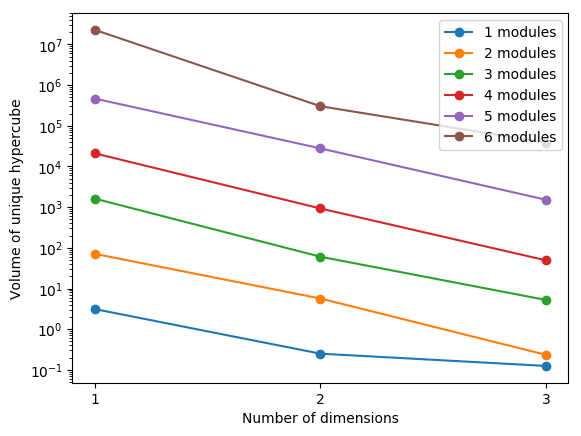

In [13]:
m = 6
k = 3

vol = experiment1(m,k,5)


1 1 1.0
1 2 0.5
1 3 0.333333333333
2 1 2.0
2 2 1.0
2 3 0.666666666667
3 1 3.0
3 2 1.5
3 3 1.0
4 1 4.0
4 2 2.0
4 3 1.33333333333
5 1 5.0
5 2 2.5
5 3 1.66666666667
6 1 6.0
6 2 3.0
6 3 2.0


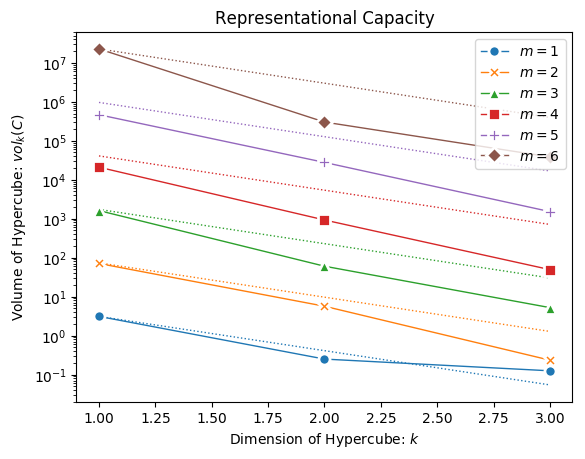

In [14]:
# plt.style.use('ggplot')
plt.style.use('default')


v1 = np.log10(vol[0,0])
vm = np.log10(vol[m-1,0])
s1 = (vm - v1)/(m - 1.)

f = np.zeros(m)

vol_ = np.zeros((m,k))
        
for i in range(1,m+1):
    for j in range(1,k+1):
        x = float(i)/float(j)
        print i,j, x
        vol_[i-1, j-1] = (10.**(v1 + (x - 1.)*s1))**j


plt.yscale('log')
plt.title("Representational Capacity")
plt.xlabel("Dimension of Hypercube: $k$")
plt.ylabel("Volume of Hypercube: $vol_k(C)$")
marker=["o", "X", "^", "s", "P", "D", "H"]
for i in range(m):
    plt.plot(np.arange(1,k+1),vol_[i,:] ,  marker=None, linestyle=":", 
                markeredgecolor="white",
             linewidth=1,
            c="C{}".format(i))
    plt.plot(np.arange(1,k+1), vol[i,:], marker=marker[i], linestyle="-", 
            markeredgecolor="white",
             markeredgewidth=2,
             markersize=8,
             linewidth=1,
             c="C{}".format(i),
             label="$m = {}$".format(i+1)
            )
    plt.legend()